In [1]:
import numpy as np

import os

from statsmodels.stats.api import DescrStatsW
from scipy.stats import ttest_rel, sem
from scipy.ndimage import gaussian_filter1d

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data = 'square'
# budget = 200

data = 'citeseer'
# data = 'bmg'
budget = 500

policies = [
    'ens jensen greedy',
    'classical ens',
    'greedy',
]

n_exps = 20
init_size = 1

basepath = os.path.join('../../data/results', data, str(1))

probs = np.ones((len(policies), n_exps, budget), dtype=float) * -1

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        tmp_probs = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__probs__{i + 1}.csv'),
            delimiter=','
        )[:, 1]
        
        probs[p_ind, i, :] = tmp_probs
        
assert np.all(probs != -1)

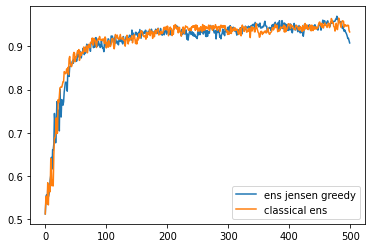

In [3]:
for p_ind, policy in enumerate(policies):
    plt.plot(probs[p_ind].mean(axis=0), label=policy)
    
plt.legend();

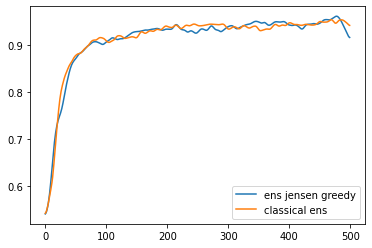

In [4]:
for p_ind, policy in enumerate(policies):
    plt.plot(
        gaussian_filter1d(probs[p_ind].mean(axis=0), sigma=3), 
        label=policy
    )
    
plt.legend();

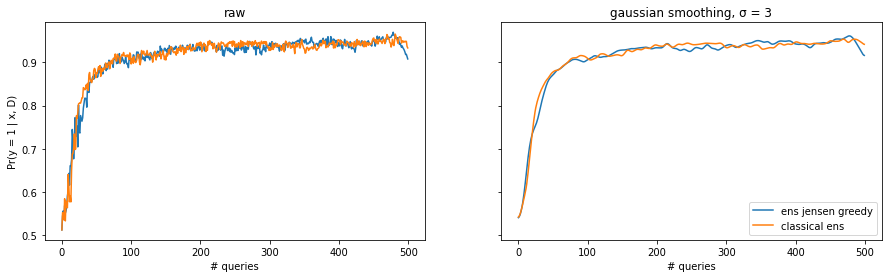

In [5]:
sigma = 3

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

for p_ind, policy in enumerate(policies):
    ax[0].plot(probs[p_ind].mean(axis=0), label=policy)
    
for p_ind, policy in enumerate(policies):
    ax[1].plot(
        gaussian_filter1d(probs[p_ind].mean(axis=0), sigma=sigma), 
        label=policy
    )
    
ax[0].set_title('raw')
ax[1].set_title(f'gaussian smoothing, σ = {sigma}')
    
ax[0].set_xlabel('# queries')
ax[1].set_xlabel('# queries')

ax[0].set_ylabel('Pr(y = 1 | x, D)')

ax[1].legend();

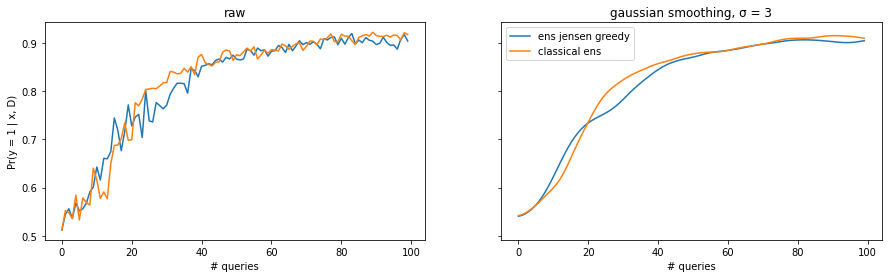

In [6]:
sigma = 3
cutoff = 100

fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

for p_ind, policy in enumerate(policies):
    ax[0].plot(probs[p_ind].mean(axis=0)[:cutoff], label=policy)
    
for p_ind, policy in enumerate(policies):
    ax[1].plot(
        gaussian_filter1d(probs[p_ind].mean(axis=0), sigma=sigma)[:cutoff], 
        label=policy
    )
    
ax[0].set_title('raw')
ax[1].set_title(f'gaussian smoothing, σ = {sigma}')
    
ax[0].set_xlabel('# queries')
ax[1].set_xlabel('# queries')

ax[0].set_ylabel('Pr(y = 1 | x, D)')

ax[1].legend();